# Laboratorium 4: Automaty komórkowe

In [34]:
import numpy as np
import matplotlib.pyplot as plt


## Zadanie 1 Deterministyczny automat komórkowy

In [5]:
len(np.random.choice(2, 3, p=[0.1, .9]))


3

### Zaimplementuj elementarny automat komórkowy działający według reguły 184_10

In [27]:
def automata(number):
    keys = [(1,1,1),(1,1,0),(1,0,1),(1,0,0),(0,1,1),(0,1,0),(0,0,1),(0,0,0)]
    rules = {key: val for key,val in zip(keys,number)}
    def update(current):
        new = []
        size = len(current)
        for i in range(size):
            l,c,r = current[i-1],current[i],current[(i+1)%size]
            new.append(rules[(l,c,r)])
        return new
    return update

In [28]:
rule_184 = [1,0,1,1,1,0,0,0]
autom_184 = automata(rule_184)

In [47]:
def run_automata(rule, size, p, iterations=100):
    ones = np.ones(int(size*p))
    zeroes = np.zeros(int(size*(1-p)))
    row = np.concatenate([ones, zeroes])
    np.random.shuffle(row)
    first_row = list(row)
    automa = automata(rule)
    rows = [first_row]
    for _ in range(iterations):
        rows.append(automa(rows[-1]))
    return rows


### Dokonaj  wizualizacji  kolejnych  stanów  automatu  (wierszami)  w  postaci  obrazu binarnego.  Rozważ  rozmiar  automatu *n=100*,  periodyczne  warunki  brzegowe oraz początkową gęstość miejsc aktywnych równą 0.4,0.5,0.6 (losowa inicjalizacja)
### Przedstaw ewolucję automatu dla 5 różnych losowych stanów początkowych (obraz2D)  i  co  najmniej  100  kolejnych  kroków  czasowych.  Co  dzieje  się  z  początkowonieuporządkowaną konfiguracją początkową? Dla jakiej gęstości początkowej miejscaktywnych pojawia się atraktor?

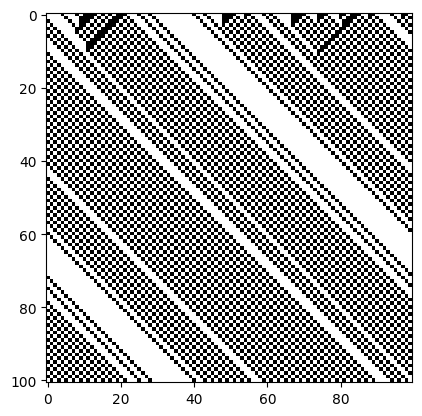

In [48]:
rows = run_automata(rule_184,100,0.4)
rows = np.array(rows)
plt.imshow(rows, cmap='binary', vmin=0, vmax=1, interpolation='nearest')

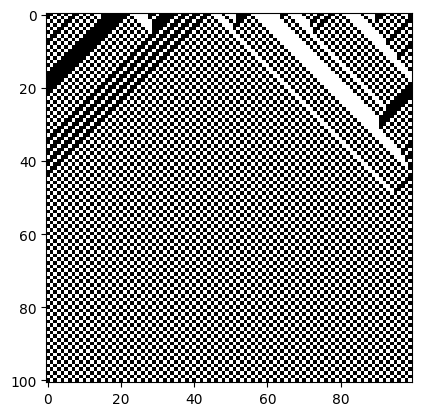

In [50]:
rows = run_automata(rule_184,100,0.5, iterations=100)
rows = np.array(rows)
plt.imshow(rows, cmap='binary', vmin=0, vmax=1, interpolation='nearest')

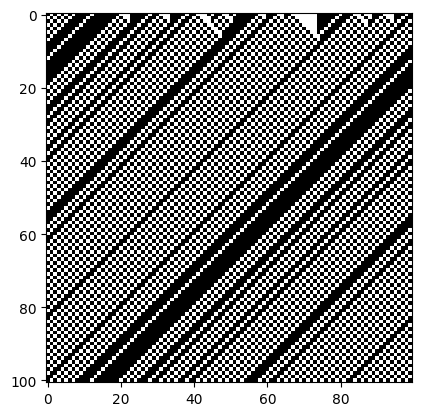

In [51]:
rows = run_automata(rule_184,100,0.6)
rows = np.array(rows)
plt.imshow(rows, cmap='binary', vmin=0, vmax=1, interpolation='nearest')

## Zadanie 2 Probabilistyczny automat komórkowy (model ruchu ulicznegoNagela-Schreckenberga)

In [86]:
import math
e = -1

def ns_automata(current, v_max, p):
    l = len(current)
    new = [e]*l
    for i in range(l):
        c = current[i]
        if c != e:
            dist = 1
            j = i+1
            while current[j%l] == e:
                dist += 1
                j += 1
            v_t05 = min(c+1, dist-1,v_max)
            v_t1 = int(np.random.choice([max(v_t05-1,0),v_t05], 1, p=[p, 1-p]))
            new[(i+v_t1)%l] = v_t1
    return new

In [90]:
def run_ns(l, v_max, p, cars, iterations=100):
    ones = -np.ones(int(l*(1-cars)))
    zeroes = np.zeros(int(l*cars))
    row = np.concatenate([ones, zeroes])
    np.random.shuffle(row)
    first_row = list(row)
    rows = [first_row]
    for _ in range(iterations):
        rows.append(ns_automata(rows[-1], v_max, p))
    return rows

### Przedstaw wizualizację działania modelu (w skali szarości, odzwierciedlającej prędkość)  dla  pierwszych  100  iteracji  przyjmując *L=100*, *v_max=2*  oraz *p=0.2*. Rozważ dwa losowe stany początkowe: gęstość samochodów 0.24 oraz 0.48.

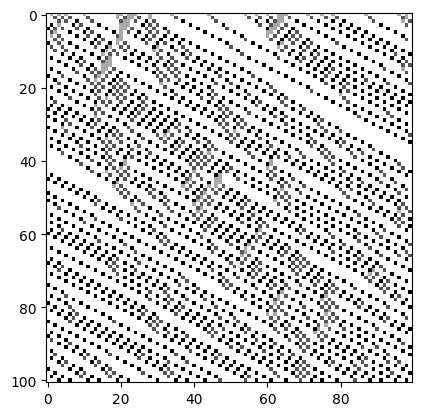

In [92]:
rows_24 = run_ns(l=100, v_max=2, p=0.2, cars=0.24, iterations=100)
img = np.array(rows_24)
plt.imshow(img, cmap='binary', vmin=-1, vmax=2, interpolation='nearest')


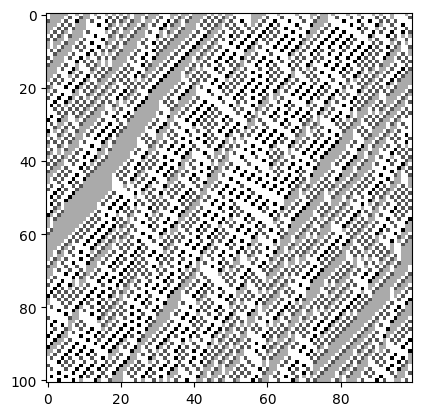

In [93]:
rows_48 = run_ns(l=100, v_max=2, p=0.2, cars=0.48, iterations=100)
img = np.array(rows_48)
plt.imshow(img, cmap='binary', vmin=-1, vmax=2, interpolation='nearest')


### Stwórz 5 animowanych GIFów przedstawiających różne sytuacje drogowe dla różnych gęstości początkowych samochodów: pokaż fale start-stop, korki, ruch laminarny

In [94]:
import imageio
import glob

def generate_gif(sim_id: int, fps: int):
    path = f'./images/sim_ns_{sim_id}/*'
    gif = f'./simulation_ns_{sim_id}.gif'
    with imageio.get_writer(gif, mode='I', fps=fps) as writer:
        for filename in sorted(glob.glob(path)):
            image = imageio.imread(filename)
            writer.append_data(image)


def save_sn(sim_id: int, rows: list[list[int]]):
    # 'upscale' grid to 400x400
    upscale = np.ones((20, 20))
    for i in range(len(rows)):
        img = np.kron(np.array(rows[i]), upscale)
        plt.imsave(f'./images/sim_ns_{sim_id}/{i:05}.png', img, cmap='binary', vmin=-1, vmax=2)

In [95]:
save_sn(24,rows_24)
generate_gif(24, 3)

/tmp/ipykernel_1720052/3924824921.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


![sim_ns_24](./gifs/simulation_ns_24.gif)

In [97]:

save_sn(48,rows_48)
generate_gif(48, 3)

/tmp/ipykernel_1720052/3924824921.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


![sim_ns_48](./gifs/simulation_ns_48.gif)

In [98]:
save_sn(2490,rows_24[90:])
generate_gif(2490, 3)

/tmp/ipykernel_1720052/3924824921.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


#### ruch laminarny
![sim_ns_2490](./gifs/simulation_ns_2490.gif)

In [99]:
save_sn(4890,rows_48[90:])
generate_gif(4890, 3)

/tmp/ipykernel_1720052/3924824921.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


#### fale start-stop
![sim_ns_4890](./gifs/simulation_ns_4890.gif)

In [101]:
save_sn(4845,rows_48[45:55])
generate_gif(4845, 3)

/tmp/ipykernel_1720052/3924824921.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


#### Korki
![sim_ns_4845](./gifs/simulation_ns_4845.gif)

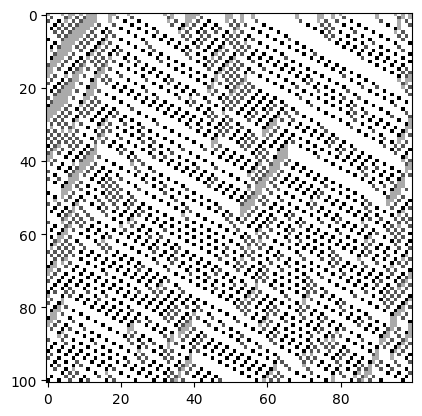

In [102]:
rows_30 = run_ns(l=100, v_max=2, p=0.2, cars=0.3, iterations=100)
img = np.array(rows_30)
plt.imshow(img, cmap='binary', vmin=-1, vmax=2, interpolation='nearest')

In [103]:
save_sn(3070,rows_30[70:80])
generate_gif(3070, 3)

/tmp/ipykernel_1720052/3924824921.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


#### ruch laminarny
![sim_ns_3070](./gifs/simulation_ns_3070.gif)

In [104]:
save_sn(3040,rows_30[40:50])
generate_gif(3040, 3)

/tmp/ipykernel_1720052/3924824921.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


#### fale start-stop
![sim_ns_3040](./gifs/simulation_ns_3040.gif)